In [9]:
import numpy as numpy
import matplotlib.pyplot as plt

In [10]:
r_in = 0.15 # m
d = 0.2
A = np.pi * r_in**2 * d


# Dimni plini
v = 20 # m/s
alpha1 = 

SyntaxError: invalid syntax (149079388.py, line 8)

In [ ]:
# User inputs
velocity = 20 # m/S
hydraulic_diameter = 0.2 # m

# Constants and estimated values
thermal_conductivity = 0.03  
# W/m*K (approximate value for diesel engine exhaust gases)
density = 1.2  
# kg/m^3 (approximate value for diesel engine exhaust gases at standard conditions)
specific_heat_capacity = 1000  
# J/kg*K (approximate value for diesel engine exhaust gases)
dynamic_viscosity = 0.00002  
# Pa*s (approximate value for diesel engine exhaust gases at standard conditions)

# Calculations
reynolds_number = (density * velocity * hydraulic_diameter) / dynamic_viscosity
prandtl_number = (specific_heat_capacity * dynamic_viscosity) / thermal_conductivity
nusselt_number = 0.023 * (reynolds_number ** 0.8) * (prandtl_number ** 0.4)
convective_heat_transfer_coefficient = (thermal_conductivity * nusselt_number) / hydraulic_diameter

# Output
print("The convective heat transfer coefficient of the exhaust gases passing through the SCR is:", convective_heat_transfer_coefficient, "W/m^2*K")


The convective heat transfer coefficient of the exhaust gases passing through the SCR is: 59.09511536613778 W/m^2*K


In [ ]:
# Exhaust gas constants
exhaust_gas_constants = {
    "density": 1.2,  # kg/m^3 (approximate value for diesel engine exhaust gases at standard conditions)
    "specific_heat_capacity": 1000,  # J/kg*K (approximate value for diesel engine exhaust gases)
    "dynamic_viscosity": 0.00002,  # Pa*s (approximate value for diesel engine exhaust gases at standard conditions)
    "temperature": 673  # K
}

# Steel housing constants
housing_constants = {
    "area": 1,  # m^2
    "thickness": 0.001,  # m
    "thermal_conductivity": 50,  # W/m*K (approximate value for typical structural steel at room temperature)
    "temperature": 573  # K
}

# Surrounding air constants
air_constants = {
    "temperature": 293,  # K
    "heat_transfer_coefficient": 10  # W/m^2*K (assumed value for free convection from a vertical plate at room temperature)
}

# Other inputs
exhaust_gas_velocity = 20  # m/s (assumed value)
hydraulic_diameter = 0.1  # m (assumed value)

# Calculations
reynolds_number = (exhaust_gas_constants["density"] * exhaust_gas_velocity * hydraulic_diameter) / exhaust_gas_constants["dynamic_viscosity"]
prandtl_number = (exhaust_gas_constants["specific_heat_capacity"] * exhaust_gas_constants["dynamic_viscosity"]) / housing_constants["thermal_conductivity"]
nusselt_number = 0.023 * (reynolds_number ** 0.8) * (prandtl_number ** 0.4)
convective_heat_transfer_coefficient = (housing_constants["thermal_conductivity"] * nusselt_number) / hydraulic_diameter

exhaust_gas_heat_transfer_rate = convective_heat_transfer_coefficient * housing_constants["area"] * (exhaust_gas_constants["temperature"] - housing_constants["temperature"])

overall_heat_transfer_coefficient = 1 / (1/air_constants["heat_transfer_coefficient"] + housing_constants["thickness"] / (housing_constants["thermal_conductivity"] * housing_constants["area"]))
delta_T = air_constants["temperature"] - housing_constants["temperature"]
heat_loss = overall_heat_transfer_coefficient * housing_constants["area"] * delta_T + exhaust_gas_heat_transfer_rate

# Output
print("The total heat loss through the steel housing is:", heat_loss, "W")


The total heat loss through the steel housing is: 579125.3166410176 W


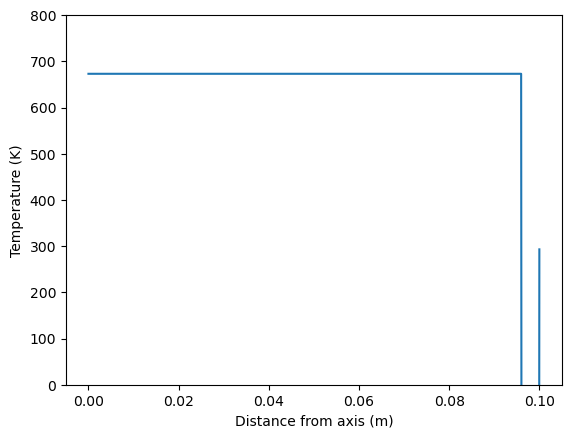

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Exhaust gas constants
exhaust_gas_constants = {
    "density": 1.2,  # kg/m^3 (approximate value for diesel engine exhaust gases at standard conditions)
    "specific_heat_capacity": 1000,  # J/kg*K (approximate value for diesel engine exhaust gases)
    "dynamic_viscosity": 0.00002,  # Pa*s (approximate value for diesel engine exhaust gases at standard conditions)
    "temperature": 673  # K
}

# Steel housing constants
housing_constants = {
    "inner_diameter": 0.2,  # m
    "wall_thickness": 0.004,  # m
    "inner_area": np.pi * ((0.2 / 2) ** 2),  # m^2
    "outer_area": np.pi * (((0.2 / 2) + 0.004) ** 2),  # m^2
    "thermal_conductivity": 50,  # W/m*K (approximate value for typical structural steel at room temperature)
    "temperature": 573  # K
}

# Surrounding air constants
air_constants = {
    "temperature": 293,  # K
    "heat_transfer_coefficient": 10  # W/m^2*K (assumed value for free convection from a vertical plate at room temperature)
}

# Insulation constants
insulation_constants = {
    "thickness": 0.02,  # m
    "thermal_conductivity": 0.03,  # W/m*K (approximate value for typical insulation at room temperature)
    "temperature": 473  # K
}

# Other inputs
exhaust_gas_velocity = 20  # m/s (assumed value)
hydraulic_diameter = 0.1  # m (assumed value)

# Calculations
reynolds_number = (exhaust_gas_constants["density"] * exhaust_gas_velocity * hydraulic_diameter) / exhaust_gas_constants["dynamic_viscosity"]
prandtl_number = (exhaust_gas_constants["specific_heat_capacity"] * exhaust_gas_constants["dynamic_viscosity"]) / housing_constants["thermal_conductivity"]
nusselt_number = 0.023 * (reynolds_number ** 0.8) * (prandtl_number ** 0.4)
convective_heat_transfer_coefficient = (housing_constants["thermal_conductivity"] * nusselt_number) / hydraulic_diameter

exhaust_gas_heat_transfer_rate = convective_heat_transfer_coefficient * housing_constants["inner_area"] * (exhaust_gas_constants["temperature"] - housing_constants["temperature"])

overall_heat_transfer_coefficient = 1 / (1/air_constants["heat_transfer_coefficient"] + housing_constants["wall_thickness"] / (housing_constants["thermal_conductivity"] * housing_constants["outer_area"]) + insulation_constants["thickness"] / (insulation_constants["thermal_conductivity"] * housing_constants["outer_area"]))
delta_T = air_constants["temperature"] - housing_constants["temperature"]
heat_loss = overall_heat_transfer_coefficient * housing_constants["outer_area"] * delta_T + exhaust_gas_heat_transfer_rate

inner_wall_temperature = exhaust_gas_constants["temperature"] - exhaust_gas_heat_transfer_rate / (housing_constants["thermal_conductivity"] * (housing_constants["inner_area"] + housing_constants["outer_area"]) / 2)

# Temperature profile
num_points = 100
r = np.linspace(0, housing_constants["inner_diameter"] / 2, num_points)
delta_r = r[1] - r[0]
T = np.zeros(num_points)

for i in range(num_points):
    if r[i] < housing_constants["inner_diameter"] / 2 - housing_constants["wall_thickness"]:
        T[i] = exhaust_gas_constants["temperature"]
    elif r[i] < housing_constants["inner_diameter"] / 2:
        T[i] = inner_wall_temperature
    else:
        delta_T = (air_constants["temperature"] - inner_wall_temperature) * np.exp(-overall_heat_transfer_coefficient * (r[i] - housing_constants["inner_diameter"] / 2) / housing_constants["thermal_conductivity"])
        T[i] = inner_wall_temperature + delta_T

# Plot temperature as a function of distance from axis
plt.plot(r, T)
plt.xlabel("Distance from axis (m)")
plt.ylabel("Temperature (K)")
plt.ylim(0 , 800)
plt.show()



In [ ]:
print(f"Heat losses: {heat_loss:.2f} W")
print(f"Input temperature: {exhaust_gas_constants['temperature']:.2f} K")
print(f"Output temperature: {T[-1]:.2f} K")

Heat losses: 18281.22 W
Input temperature: 673.00 K
Output temperature: 293.00 K


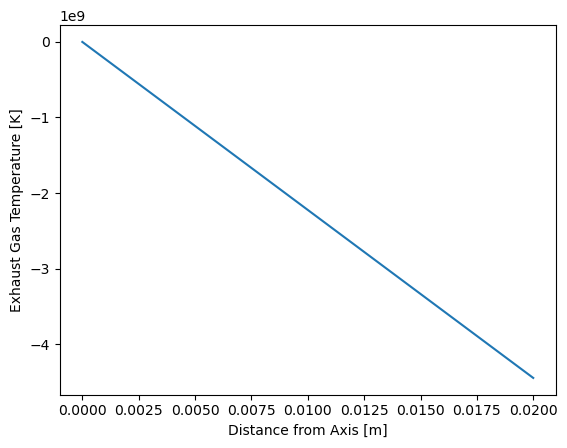

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Input constants
exhaust_gas_constants = {
    "temperature": 700, # K
    "velocity": 20, # m/s
    "density": 1.2, # kg/m^3
    "specific_heat": 1000, # J/kg-K
    "viscosity": 1.8e-5, # kg/m-s
    "thermal_conductivity": 3 # W/m-K
}

housing_constants = {
    "inner_diameter": 0.04, # m
    "wall_thickness": 0.004, # m
    "inner_area": np.pi * 0.02**2 * 0.5,
    "outer_area": np.pi *( 0.02 + 0.002)**2 * 0.5,
    "length": 0.5, # m
    "thermal_conductivity": 60, # W/m-K
    "temperature": 600, # K
}

air_constants = {
    "temperature": 293, # K
    "thermal_conductivity": 0.024, # W/m-K
    "kinematic_viscosity": 1.5e-5, # m^2/s
    "prandtl_number": 0.71
}

insulation_constants = {
    "thickness": 0.02, # m
    "thermal_conductivity": 0.05 # W/m-K
}

# Calculations
# Exhaust gases to steel housing
Re = exhaust_gas_constants["velocity"] * housing_constants["inner_diameter"] / exhaust_gas_constants["viscosity"]
Nu = 0.023 * Re ** 0.8 * exhaust_gas_constants["density"] ** 0.3 * exhaust_gas_constants["specific_heat"] ** 0.3 * exhaust_gas_constants["viscosity"] ** (-0.6)
h_eg = Nu * exhaust_gas_constants["thermal_conductivity"] / housing_constants["inner_diameter"]
q_conv_eg = h_eg * housing_constants["inner_area"] * (exhaust_gas_constants["temperature"] - housing_constants["temperature"])

# Steel housing to surrounding air
h_sh = housing_constants["thermal_conductivity"] * housing_constants["outer_area"] / (housing_constants["wall_thickness"] * (housing_constants["outer_area"] - housing_constants["inner_area"]))
q_conv_sh = h_sh * housing_constants["outer_area"] * (housing_constants["temperature"] - air_constants["temperature"])

# Radiation losses
q_rad = housing_constants["outer_area"] * (housing_constants["temperature"] ** 4 - air_constants["temperature"] ** 4) * 5.67e-8

# Insulation
q_cond_insulation = insulation_constants["thermal_conductivity"] * housing_constants["length"] * housing_constants["outer_area"] / insulation_constants["thickness"]
q_conv_insulation = h_sh * housing_constants["outer_area"] * (housing_constants["temperature"] - air_constants["temperature"])
q_insulation = q_cond_insulation + q_conv_insulation

# Total heat loss
q_losses = q_conv_eg + q_conv_sh + q_rad + q_insulation

# Temperature difference from input and output
delta_T = q_losses / (housing_constants["length"] * housing_constants["outer_area"])

# Temperature profile
r = np.linspace(0, housing_constants["inner_diameter"] / 2, 100)
T = exhaust_gas_constants["temperature"] - delta_T * r / housing_constants["inner_diameter"]

# Plotting
plt.plot(r, T)
plt.xlabel("Distance from Axis [m]")
plt.ylabel("Exhaust Gas Temperature [K]")
plt.show()



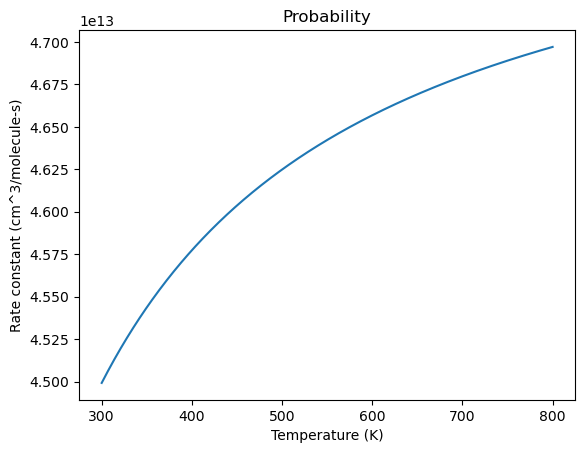

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Reaction constants
A = 4.82e13  # pre-exponential factor in cm^3/molecule-s
Ea = 171.8   # activation energy in kJ/mol
R = 8.314    # gas constant in J/mol-K

# Temperature range
T_range = np.arange(300, 801)

# Calculate rate constant for each temperature using the Arrhenius equation
k = A * np.exp(-Ea / (R * T_range))

# Plot the probability as a function of temperature
plt.plot(T_range, k)
plt.xlabel('Temperature (K)')
plt.ylabel('Rate constant (cm^3/molecule-s)')
plt.title('Probability')
plt.show()


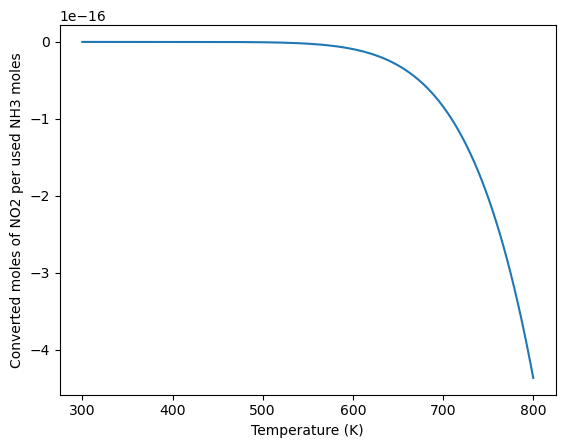

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define rate constants in cm^3/mol-s
A = 9.03e-11
Ea = 76.8e3

# Define conversion factor from cm^3/mol-s to moles of NO2 consumed per mole of NH3 used
conv_factor = -2/4

# Define temperature range to plot
T_range = np.arange(300, 801)

# Calculate rate constant at each temperature
k = A * np.exp(-Ea / (8.314 * T_range))

# Convert rate constant to moles of NO2 consumed per mole of NH3 used
k_conv = k * conv_factor

# Plot rate constant vs. temperature
plt.plot(T_range, k_conv)
plt.xlabel('Temperature (K)')
plt.ylabel('Converted moles of NO2 per used NH3 moles')
plt.show()


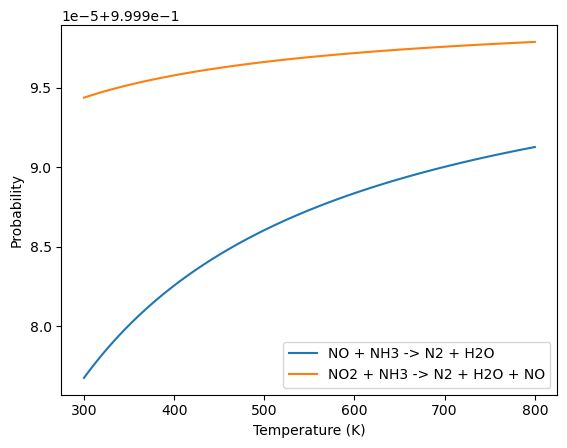

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k1 = 5.8e-2 # Reaction rate constant for NO + NH3 -> N2 + H2O, units: cm^3/(molecule*s)
k2 = 1.4e-2 # Reaction rate constant for NO2 + NH3 -> N2 + H2O + NO, units: cm^3/(molecule*s)
R = 8.314 # Gas constant, units: J/(mol*K)

# Define temperature range
T_range = np.linspace(300, 800, 100) # Units: K

# Calculate probability for each temperature
prob1 = np.exp(-k1/(R*T_range)) # Probability of reaction 1: NO + NH3 -> N2 + H2O
prob2 = np.exp(-k2/(R*T_range)) # Probability of reaction 2: NO2 + NH3 -> N2 + H2O + NO

# Plot probabilities as a function of temperature
plt.plot(T_range, prob1, label='NO + NH3 -> N2 + H2O')
plt.plot(T_range, prob2, label='NO2 + NH3 -> N2 + H2O + NO')
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.legend()
plt.show()
